In [1]:
import numpy as np
import pandas as pd

In [36]:
df = pd.read_csv('/content/50_Startups.csv')

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.shape

(108, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [13]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [15]:
import seaborn as sns

<ipython-input-17-8451b8490161>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True)


<Axes: >

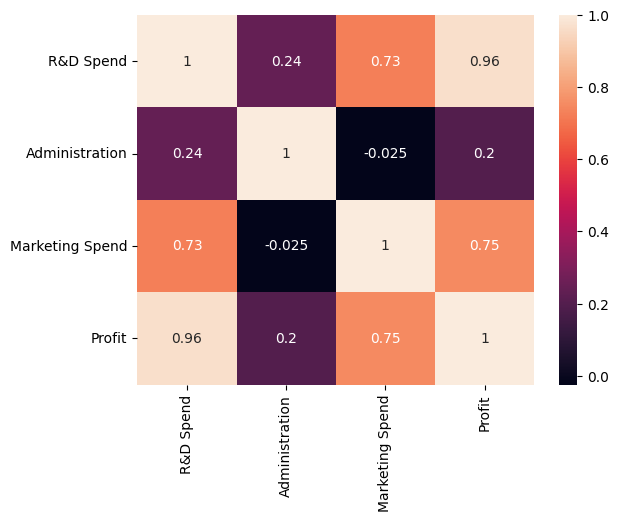

In [17]:
sns.heatmap(df.corr(),annot =True)

In [35]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [37]:
X = df.drop(columns =['Profit'])
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [38]:
y = df.Profit
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [39]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [42]:
X.State = le.fit_transform(X.State)

In [43]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [44]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [45]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.2,random_state =0)

In [55]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State
26,0.455574,0.706845,0.284134,0.5
93,0.859438,0.305328,0.776136,0.5
33,0.335617,0.394134,0.454943,0.5
3,0.873136,0.512998,0.812235,1.0
66,0.436093,0.582978,0.748613,1.0


In [48]:
x_train.shape

(86, 4)

In [49]:
x_test.shape

(22, 4)

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred = lr.predict(x_test)

In [60]:
profit = pd.DataFrame({'actual y_value':y_test,'predicted y value':y_pred})
profit.head(10)

,actual y_value,predicted y value
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


In [61]:
from sklearn import metrics

In [62]:
print(metrics.r2_score(y_test,y_pred))

0.9258962347553817


In [67]:
lr.predict([[165349.20,118671.85,471784.10,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.91238009e+10])